In [167]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [3]:
# This constant limits the number of rows read in from the big CSV file.
# Set to None if you want to read the whole thing
LIMIT = None

In [2]:
path = "../data/pecanstreet/15minute_data_austin/"

In [178]:
# read the 15 minute data file for California
all_data = pd.read_csv(path+"15minute_data_austin.csv",
                                  parse_dates=['local_15min'])#, index_col=['local_15min'])

In [179]:
all_data.head()

,dataid,local_15min,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,661,2018-11-21 15:15:00-06:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.915,124.277
1,661,2018-11-21 15:30:00-06:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.959,124.293
2,661,2018-11-21 15:45:00-06:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.886,124.240
3,661,2018-11-21 16:00:00-06:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.880,124.175
4,661,2018-11-21 16:15:00-06:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.633,124.226


In [180]:
# read in the metadata file, skip the 2nd row because it has the comments further describing the headers
metadata=pd.read_csv(path+"metadata.csv", engine='python', encoding="ISO-8859-1", skiprows=[1])

In [195]:
# filter down to our houses of interest. Active, Austin-based, has complete data, and has the grid circuit
dataids = metadata[metadata.active_record.eq('yes') &
                   metadata.city.eq('Austin') &
                   metadata.egauge_1min_data_availability.isin(['100%', '99%', '98%', '97%','96%','95%']) &
                   metadata.grid.eq('yes')]

In [196]:
# filter down to the dataids we're interested in
filt = all_data[all_data.dataid.isin(dataids.dataid)]
filt["local_15min"] = pd.to_datetime(filt["local_15min"], utc=True, infer_datetime_format=True)
filt["local_15min"] = filt["local_15min"].dt.tz_convert('US/Central')
# filt = filt.tz_convert('US/Central')

/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [197]:
filt

,dataid,local_15min,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,661,2018-11-21 15:15:00-06:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.915,124.277
1,661,2018-11-21 15:30:00-06:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.959,124.293
2,661,2018-11-21 15:45:00-06:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.886,124.240
3,661,2018-11-21 16:00:00-06:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.880,124.175
4,661,2018-11-21 16:15:00-06:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.633,124.226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838246,9922,2018-12-31 22:45:00-06:00,0.002,-0.005,NaN,NaN,NaN,NaN,NaN,0.113,...,NaN,NaN,0.014,NaN,NaN,NaN,NaN,NaN,121.612,121.570
838247,9922,2018-12-31 23:00:00-06:00,0.002,-0.005,NaN,NaN,NaN,NaN,NaN,0.106,...,NaN,NaN,0.014,NaN,NaN,NaN,NaN,NaN,121.580,121.445
838248,9922,2018-12-31 23:15:00-06:00,0.001,-0.004,NaN,NaN,NaN,NaN,NaN,0.114,...,NaN,NaN,0.013,NaN,NaN,NaN,NaN,NaN,121.609,121.351
838249,9922,2018-12-31 23:30:00-06:00,0.001,-0.004,NaN,NaN,NaN,NaN,NaN,0.117,...,NaN,NaN,0.013,NaN,NaN,NaN,NaN,NaN,121.667,121.482


In [184]:
# Count NaN values per column
nan_counts = filt.isna().sum()

# Sort the columns by the count of non-NaN values (in descending order)
# This is done by subtracting NaN counts from the total length of the DataFrame to get non-NaN counts
sorted_columns = nan_counts.sort_values(ascending=True).index.tolist()

# Print the column names, sorted by most non-NaN values
print(sorted_columns)

['dataid', 'local_15min', 'grid', 'leg1v', 'leg2v', 'dishwasher1', 'air1', 'furnace1', 'clotheswasher1', 'microwave1', 'refrigerator1', 'solar', 'kitchenapp1', 'oven1', 'drye1', 'kitchenapp2', 'disposal1', 'bedroom1', 'car1', 'lights_plugs2', 'lights_plugs1', 'dryg1', 'bathroom1', 'livingroom1', 'venthood1', 'office1', 'lights_plugs3', 'kitchen1', 'range1', 'sprinkler1', 'bedroom2', 'utilityroom1', 'garage1', 'furnace2', 'bedroom3', 'diningroom1', 'refrigerator2', 'airwindowunit1', 'lights_plugs4', 'oven2', 'kitchen2', 'air2', 'bathroom2', 'outsidelights_plugs1', 'winecooler1', 'waterheater2', 'waterheater1', 'freezer1', 'battery1', 'security1', 'sewerpump1', 'shed1', 'bedroom4', 'solar2', 'car2', 'sumppump1', 'aquarium1', 'wellpump1', 'bedroom5', 'circpump1', 'icemaker1', 'poolpump1', 'housefan1', 'heater3', 'air3', 'heater2', 'heater1', 'lights_plugs5', 'lights_plugs6', 'garage2', 'livingroom2', 'diningroom2', 'outsidelights_plugs2', 'clotheswasher_dryg1', 'pool1', 'pool2', 'jacuzzi1

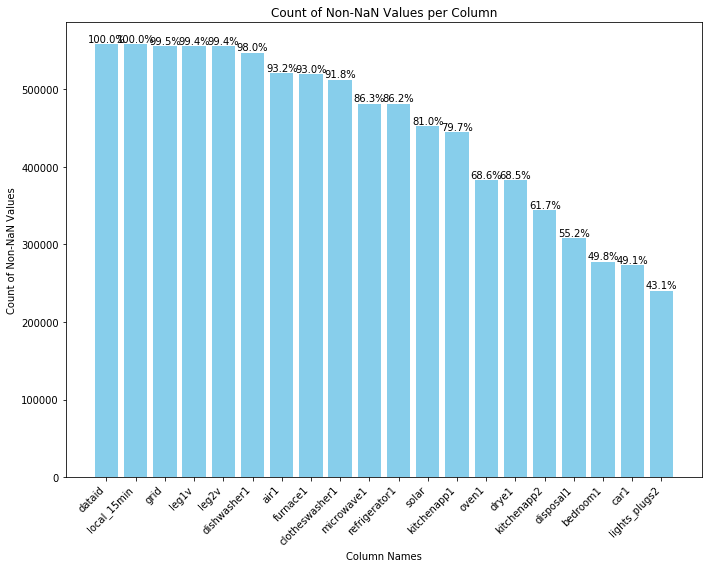

In [185]:
# Calculate the count of non-NaN values for each column
non_nan_counts = filt.count()

# Calculate total number of rows for percentage calculation
total_rows = len(filt)

# Calculate the percentage of non-NaN values for each column
percentages = (non_nan_counts / total_rows) * 100

# Sort the counts in descending order to display the column with the most non-NaN values first
sorted_counts = non_nan_counts.sort_values(ascending=False)[:20]
sorted_percentages = percentages.sort_values(ascending=False)[:20]

# Create the bar chart
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
bars = plt.bar(sorted_counts.index, sorted_counts.values, color='skyblue')

# Add percentage labels on each bar
for bar, percentage in zip(bars, sorted_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{percentage:.1f}%', ha='center', va='bottom')

# Add title and labels to make the chart informative
plt.title('Count of Non-NaN Values per Column')
plt.xlabel('Column Names')
plt.ylabel('Count of Non-NaN Values')
plt.xticks(rotation=45, ha='right')  # Rotate column names for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [186]:
cols = ["dataid", "local_15min", "air1", "furnace1", "clotheswasher1", "microwave1", "refrigerator1"]
filt2 = filt[cols].fillna(0)
cols_to_sum=["air1", "furnace1", "clotheswasher1", "microwave1", "refrigerator1"]
filt2['total'] = filt2[cols_to_sum].sum(axis=1)



In [187]:
filt2['year']=filt2["local_15min"].dt.year
filt2['month']=filt2["local_15min"].dt.month
filt2['day']=filt2["local_15min"].dt.day
filt2['hour']=filt2["local_15min"].dt.hour
filt2['minute']=filt2["local_15min"].dt.minute
filt2['hourminute'] = filt2['local_15min'].dt.strftime('%H:%M')


In [198]:
filt2["max_total_per_zone"] = filt2.groupby("dataid")["total"].transform("max")

In [199]:
filt2

,dataid,local_15min,air1,furnace1,clotheswasher1,microwave1,refrigerator1,total,year,month,day,hour,minute,hourminute,max_total_per_zone
0,661,2018-11-21 15:15:00-06:00,0.000,0.000,0.000,0.0,0.0,0.000,2018,11,21,15,15,15:15,4.127
1,661,2018-11-21 15:30:00-06:00,0.000,0.000,0.000,0.0,0.0,0.000,2018,11,21,15,30,15:30,4.127
2,661,2018-11-21 15:45:00-06:00,0.000,0.000,0.000,0.0,0.0,0.000,2018,11,21,15,45,15:45,4.127
3,661,2018-11-21 16:00:00-06:00,0.000,0.000,0.000,0.0,0.0,0.000,2018,11,21,16,0,16:00,4.127
4,661,2018-11-21 16:15:00-06:00,0.000,0.000,0.000,0.0,0.0,0.000,2018,11,21,16,15,16:15,4.127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838246,9922,2018-12-31 22:45:00-06:00,0.002,0.012,0.084,0.0,0.0,0.098,2018,12,31,22,45,22:45,5.461
838247,9922,2018-12-31 23:00:00-06:00,0.002,0.012,0.084,0.0,0.0,0.098,2018,12,31,23,0,23:00,5.461
838248,9922,2018-12-31 23:15:00-06:00,0.001,0.012,0.009,0.0,0.0,0.022,2018,12,31,23,15,23:15,5.461
838249,9922,2018-12-31 23:30:00-06:00,0.001,0.012,0.003,0.0,0.0,0.016,2018,12,31,23,30,23:30,5.461


In [188]:
filt2['dataid']

0          661
1          661
2          661
3          661
4          661
          ... 
838246    9922
838247    9922
838248    9922
838249    9922
838250    9922
Name: dataid, Length: 558367, dtype: int64

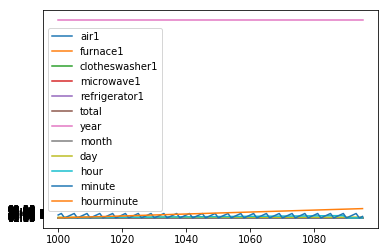

In [189]:
start=1000
filt_661=filt2[filt2["dataid"]==661][start:start+4*24]
plt.plot(figsize=(16,10))
for c in filt_661.columns:
    if c=="dataid" or c=="local_15min": continue
    plt.plot(filt_661[c], label=c)
plt.legend()

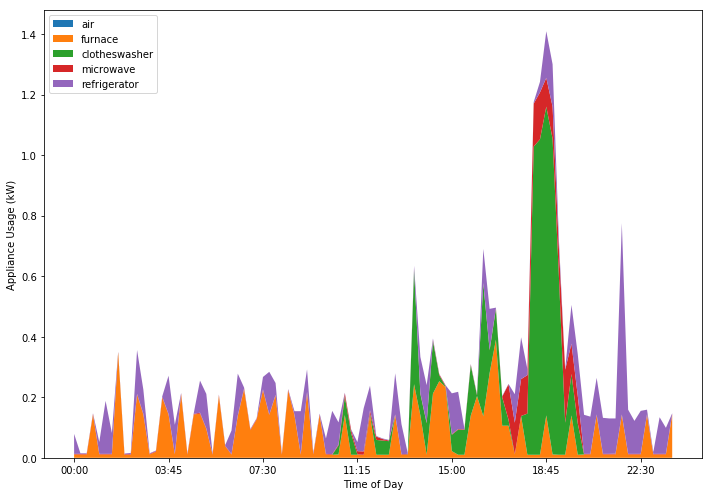

In [190]:
start=994
days=1
filt_661=filt2[filt2["dataid"]==661][start:start+4*24*days]

vals=[filt_661['air1'], 
              filt_661['furnace1'], 
              filt_661['clotheswasher1'], 
              filt_661['microwave1'], 
              filt_661['refrigerator1']]
plt.figure(figsize=(10, 7))
plt.stackplot(filt_661["hourminute"],
              *vals,
              labels=['air', 'furnace', 'clotheswasher', 'microwave', 'refrigerator'])

# Set up the x-axis ticks to only show every 10th tick
ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure we have integer ticks

# Add the legend, labels, and title
plt.legend(loc='upper left')
plt.xlabel('Time of Day')
plt.ylabel('Appliance Usage (kW)')
plt.tight_layout()
plt.savefig("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/SpringInterimReport/pecanstreet_prelim.pdf", format="pdf", bbox_inches="tight")
# Show the plot
plt.show()